<a href="https://colab.research.google.com/github/asu-trans-ai-lab/DLSim-MRM/blob/main/Generating_a_GMNS_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Generating a multi-resolution network using UMD campus as an example***
# Yuanzheng Lei (yzlei@umd.edu)

# *1.1 How to download a free map file from OpenStreetMap?*

Before the offical introduction, we first introduce a concept called GNMS. General Travel Network Format Specification(GNMS) is a product of Zephyr Foundation, which aims to advance the field through flexible and efficient support, education, guidance, encouragement, and incubation.

In this berif introduction, we will shown you how to generate a multi-resolution network tamplate by what tools, and use other two tools called path4gmns and DLSIM to realize some basic transportation modeling and simulation fuction in this template. To generate a multi-resolution network tamplate, the first tool you need is a python package called OSM2GMNS, which is is an open-source python package which can help users easily convert networks from OpenStreetMap to .csv files with standard GMNS format for visualization, traffic simulation and planning purpose. For more information, please check  [OSM2GMNS](https://github.com/asu-trans-ai-lab/OSM2GMNS). You can either install it via pip :

In [ ]:
pip install osm2gmns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.0 MB/s 
     |████████████████████████████████| 1.3 MB 4.4 MB/s 


Or you can install this package inside your python IDIE, take Pycharm as an example (shown as follow), you can go to->Files->Settings->Python interpreter, and you can install any packages in the right-side window. 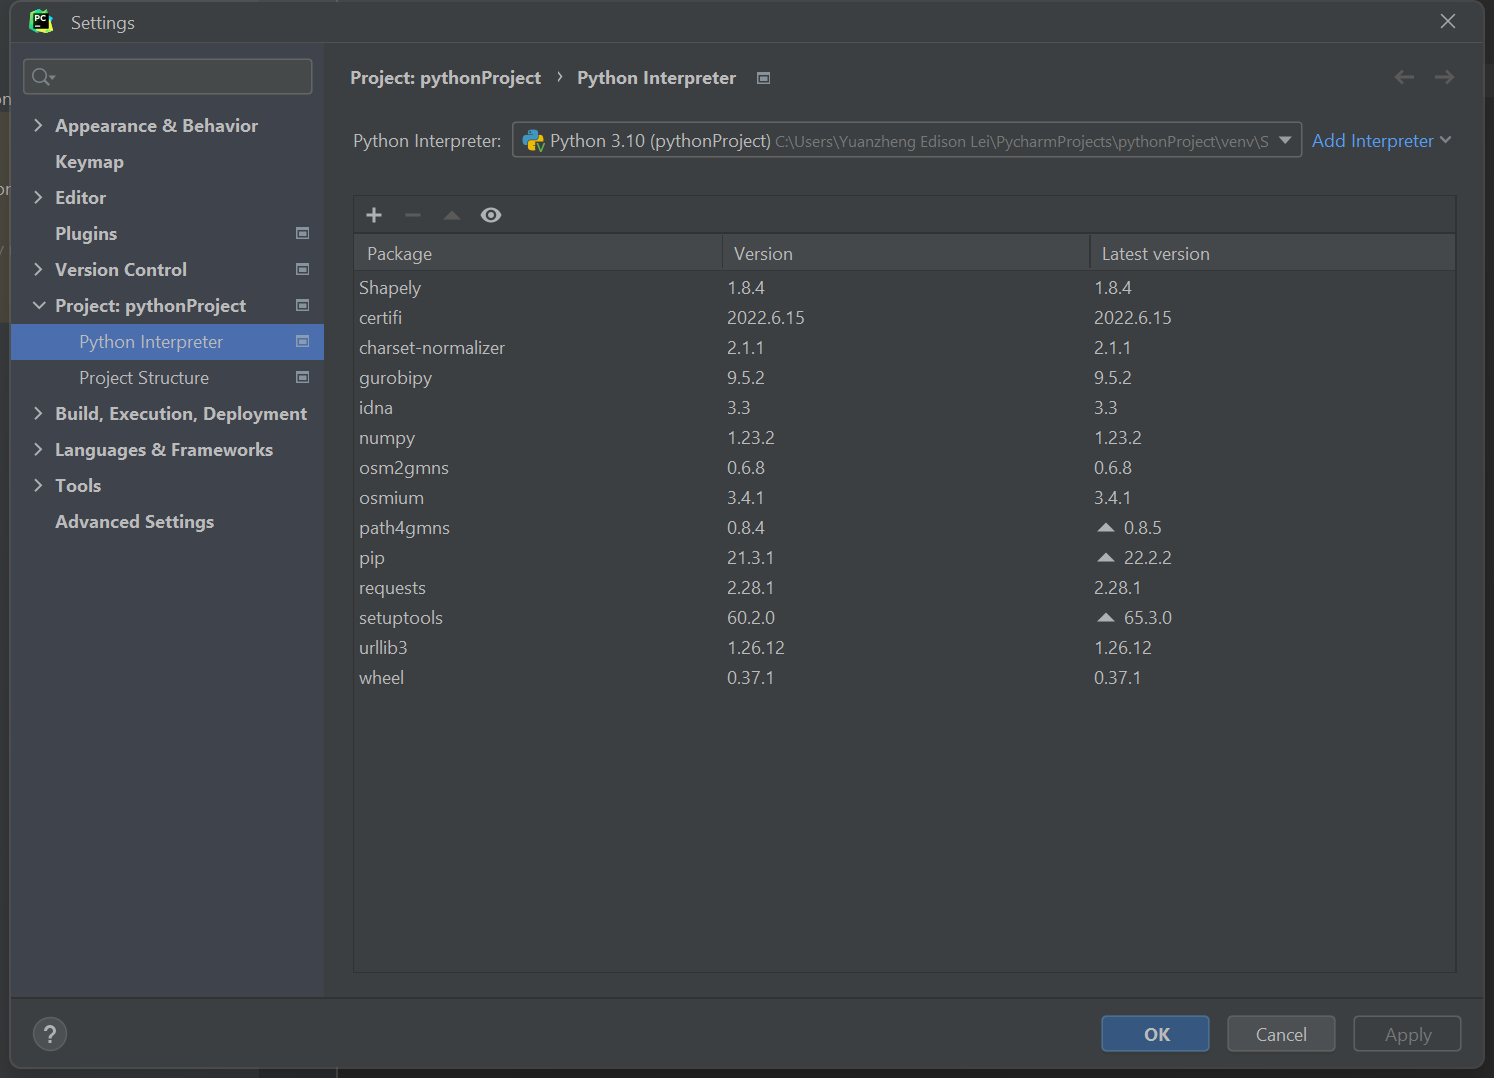

After you installed the package OSM2GMNS, you can download any map data you want from OpenStreetMap [OSM](https://www.openstreetmap.org), which is a free, open-source, editable map website that can provide free downloads. From this website, we can easily search for any target like a university or a railway station, in this case, we take university of maryland campus as an example. First, you just need to search for university of maryland in the left side search window, and then you can see a general region, so you can adjust the size of the region that you want to export as a .osm map file. It is noted that only a .osm map file can be directly convert in the GMNS format by this package.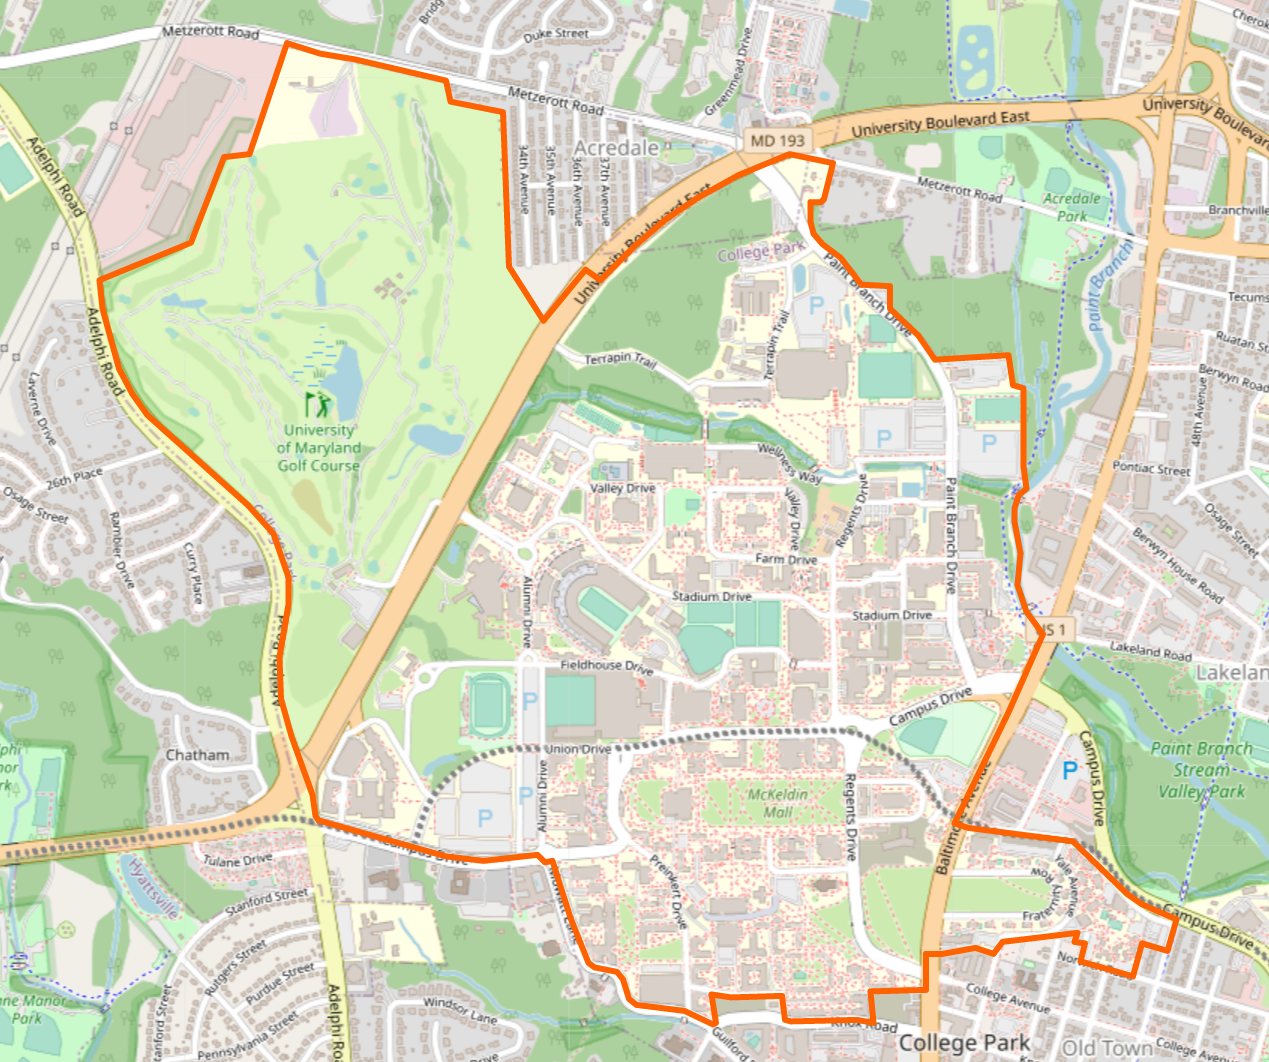

Then, we can Create a network from map.osm file and consolidate complex intersections by (put the .osm map file in the source folder of the python file !!):

In [ ]:
import osm2gmns as og
net = og.getNetFromOSMFile('map.osm')
og.outputNetToCSV(net)  

         Please use getNetFromFile().
arguments used for network parsing:
  filename: map.osm
  network_types: ('auto',)
  link_types: all
  POI: False
  POI_sampling_ratio: 1.0
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
  number of nodes: 357, number of links: 646, number of pois: 0
Outputting Network Files


After successfully running the code, In most cases, you will get two .cvs files called node and link, respectively. You can use the following code to realize that if you want to put those two files in a new folder. But if you use an old version of the osm2gmns package, after running the following code, the output windows may show some warning "getNetFromCSV() is deprecated and will be removed in a future release.". Don't worry about it. It won't affect the output files. You can choose to ignore it or use the following code. The next section will show how to use relevant tools to visualize the generated network using these two files.

In [ ]:
net = og.loadNetFromCSV()
og.consolidateComplexIntersections(net)
og.outputNetToCSV(net, output_folder='consolidated')

SystemExit: ignored

# *1.2 How to visualize the generated network*? 

You can visualize generated networks using [NeXTA](https://github.com/asu-trans-ai-lab/NeXTA4GMNS) or [QGIS](https://qgis.org/en/site/). In this case, we will use QGIS to transfer these two files to a network. Open GMNS node.csv and link.csv in Excel to verify the existence of the geometry field.
Open QGIS and click on menu Layer->Add Layer->Add Delimited Text Layer. In the following dialogue box, load GMNS node.csv and link.csv, and ensure WKT is selected as geometry definition. For more information about how to visualize the generated network in other software, please check [NeXTA](https://github.com/asu-trans-ai-lab/NeXTA4GMNS).
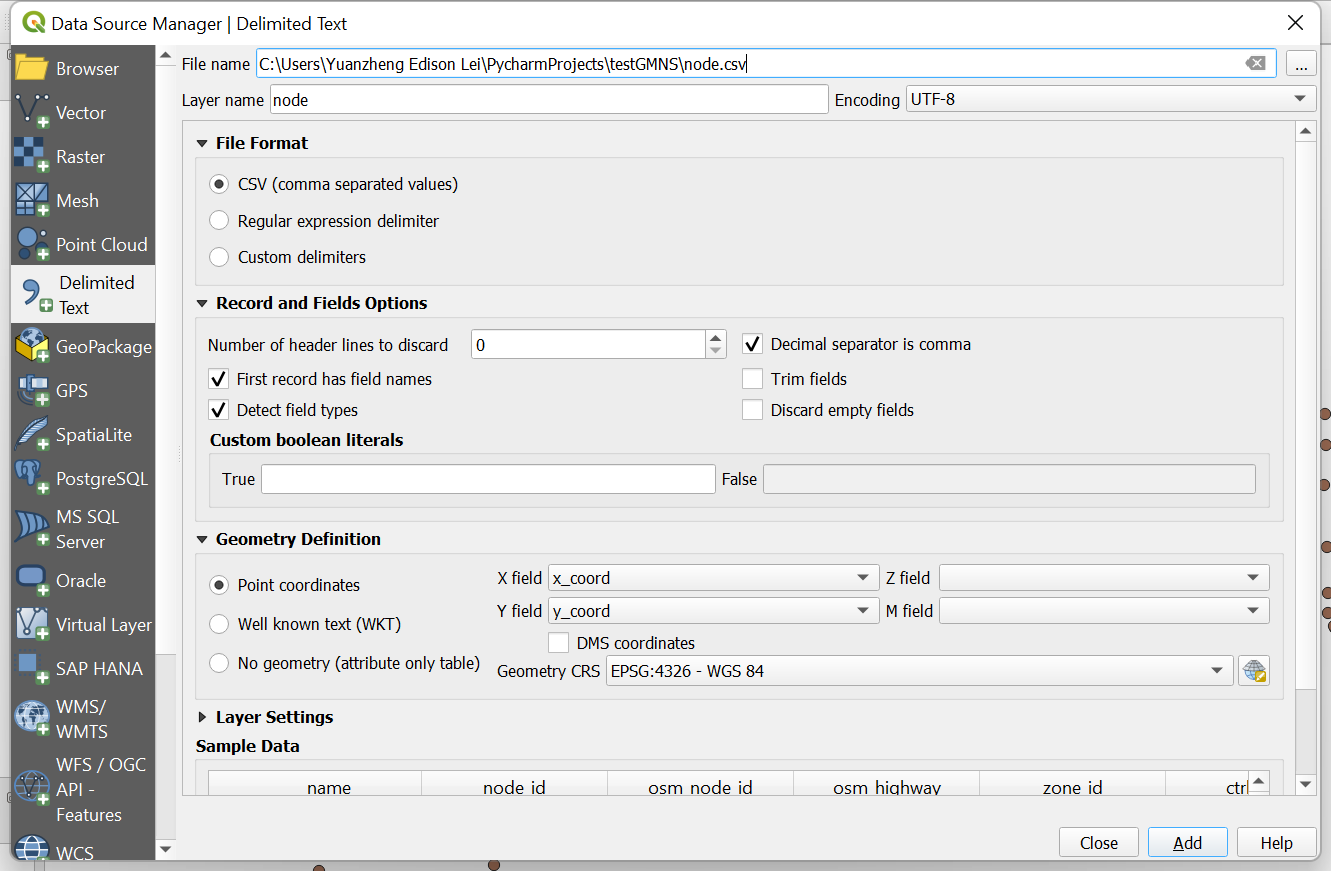
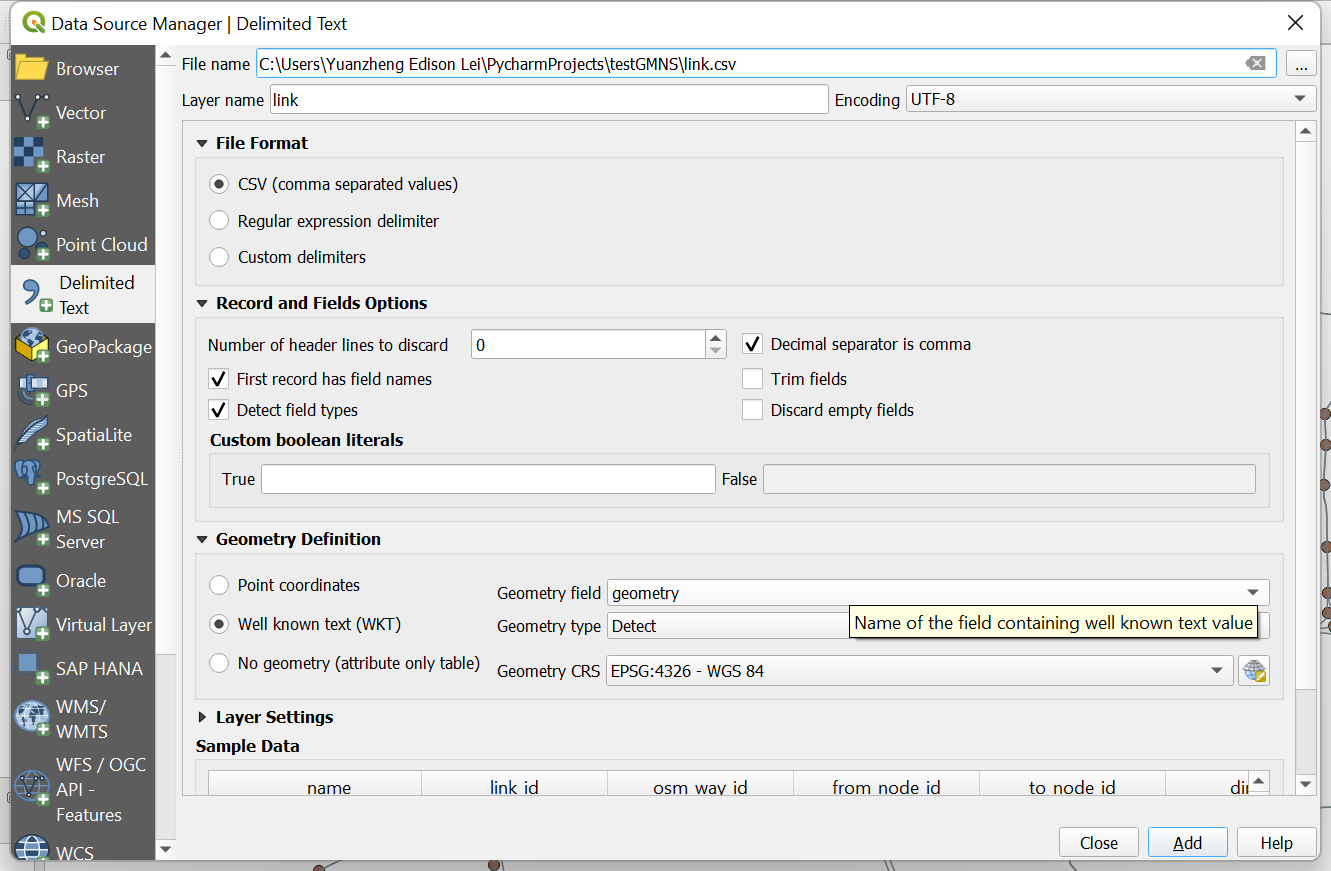

The generated network is shown as follow:
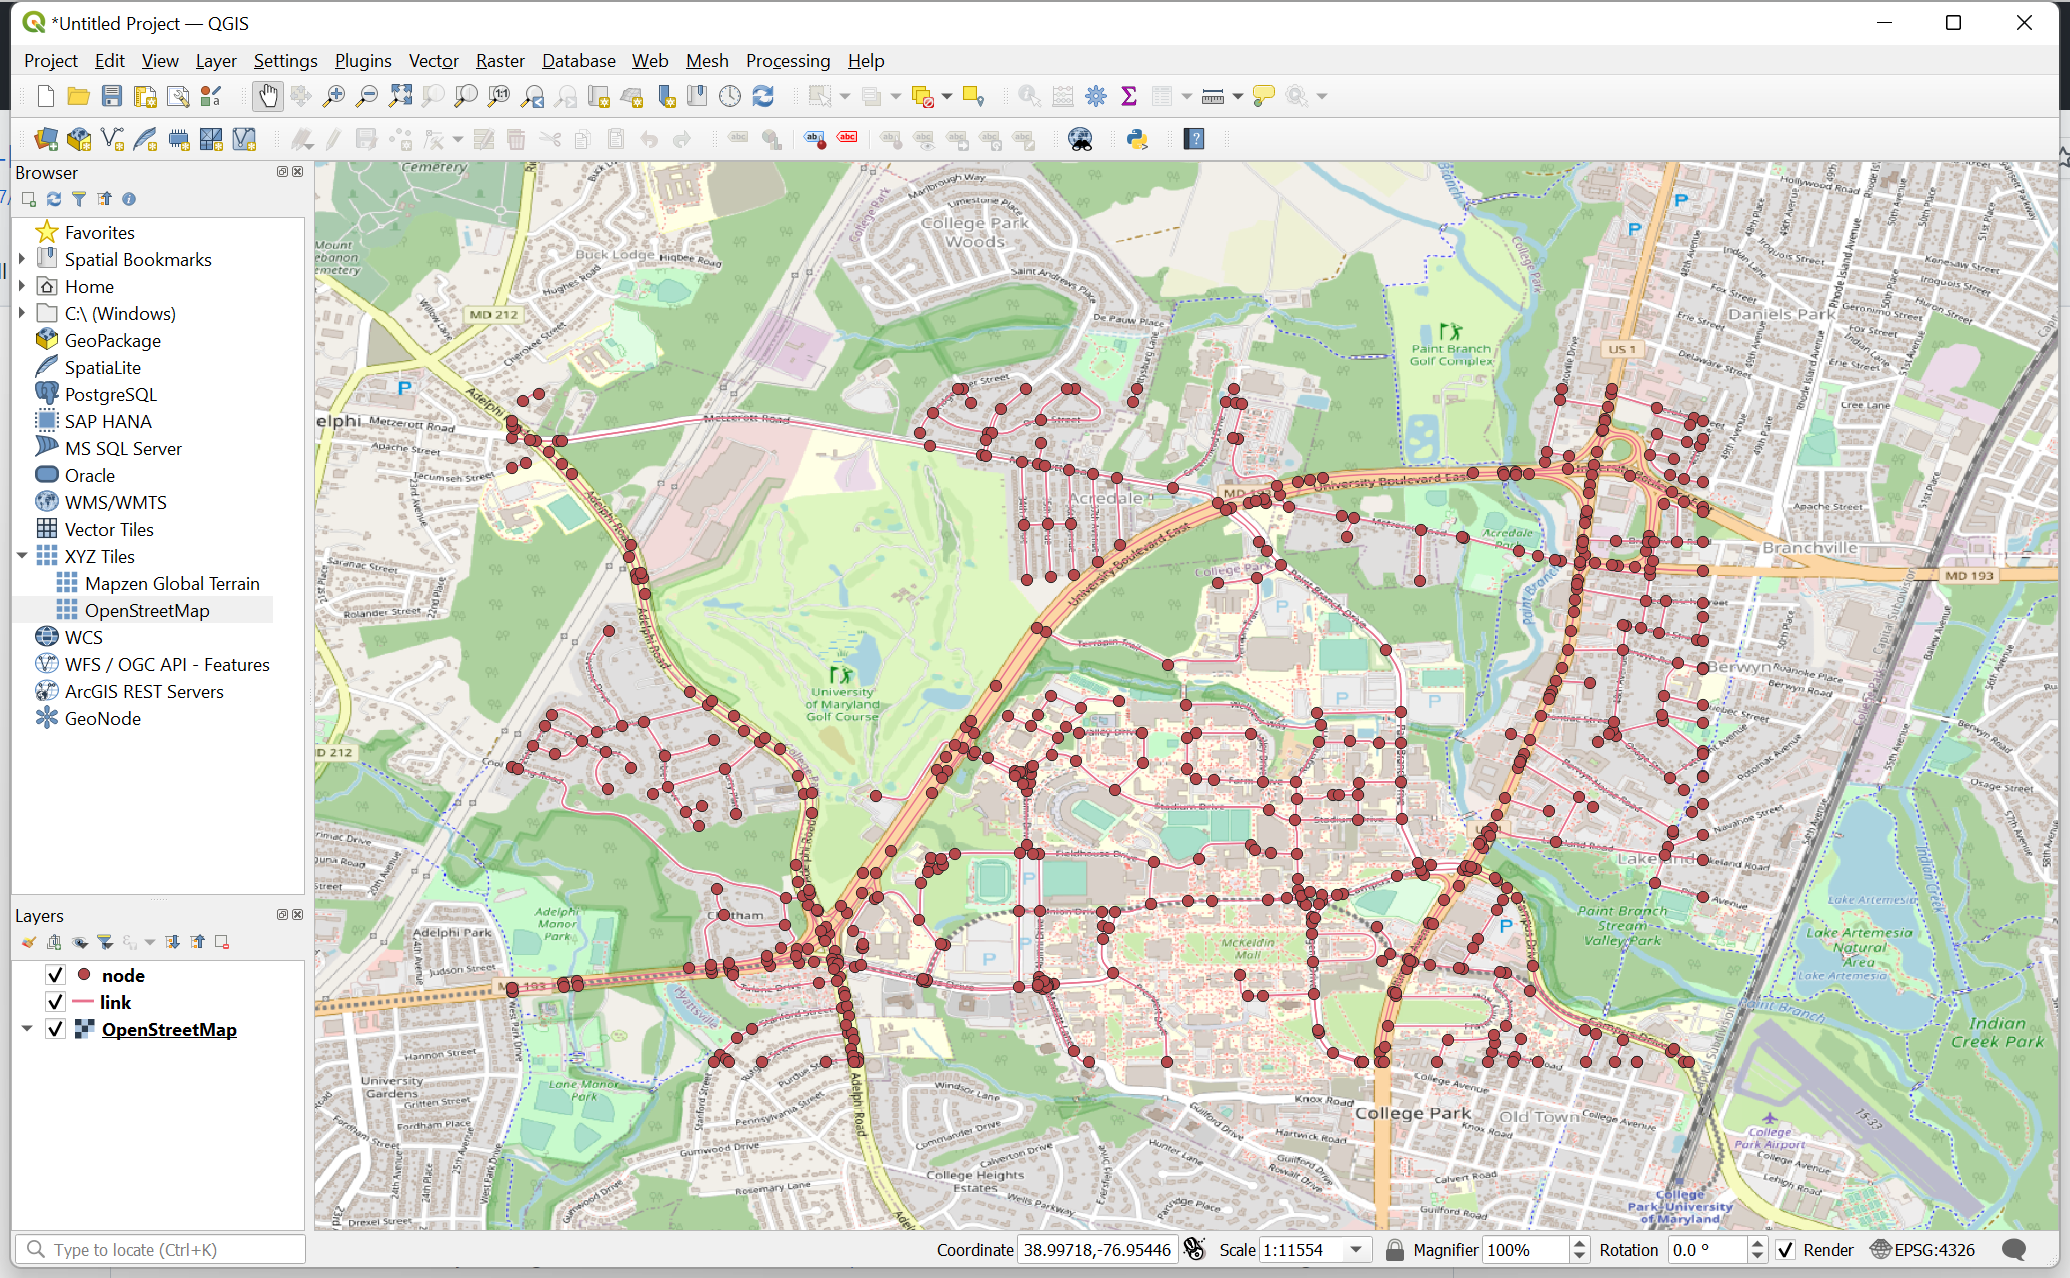

# 2.1 *How to use the Path4GMNS package to generate the demand of a network and solve some basic transportation problems?*

## *2.1.1 A simple fuction -- find the shortest path.*

The first thing you need to do is install the Path4GMNS package (Path4GMNS is an open-source, cross-platform, lightweight, and fast Python path engine for networks encoded in GMNS.), because the Path4GMNS has been published on PyPI, so it can be installed using:

In [ ]:
pip install path4gmns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 23.9 MB/s 


If you need a specific version of Path4GMNS, like, 0.8.7a1. It can be installed using:

In [ ]:
pip install path4gmns==0.8.7a1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 27.8 MB/s 


The first useful fuction we are going to introduced is to find the shortest distance path between two nodes. To find the shortest distance path between two nodes, you can use following code:

In [ ]:
import path4gmns as pg
network = pg.read_network(load_demand=False)
print('\nshortest path (node id) from node 1 to node 2, '+network.find_shortest_path(1, 2))



Please provide settings.yml next time!
Engine will set up one demand period and one agent type using default values for you, which might NOT reflect your case!

read node.csv
the number of nodes is 357
read link.csv
the number of links is 646

shortest path (node id) from node 1 to node 2, distance: 4386.10 | path: 1;0;271;285;222;221;223;224;225;138;139;190;64;65;66;288;287;243;122;162;153;154;155;62;63;193;21;197;256;333;42;184;235;182;183;7;2


You can show the path by a sequence of nodes (above code) or links(following code).

In [ ]:
print('\nshortest path (link id) from node 1 to node 2, '+network.find_shortest_path(1, 2, seq_type='link'))


shortest path (link id) from node 1 to node 2, distance: 4386.10 | path: 1;516;456;616;275;313;276;312;326;155;222;243;62;64;477;462;575;330;447;180;168;445;169;61;567;471;232;361;590;591;298;299;304;204;440;389


You can specify the absolute path or the relative path from your cwd in read_network() to use a particular network from the downloaded sample data set (shown in the following). But in this case, we only focus on the data set that was created by ourselves.

In [ ]:
"""
pg.download_sample_data_sets()
network = pg.read_network(load_demand=False, input_dir='data/Chicago_Sketch')
print('\nshortest path (node id) from node 1 to node 2, '+network.find_shortest_path(1, 2))
print('\nshortest path (link id) from node 1 to node 2, '+network.find_shortest_path(1, 2, seq_type='link'))
"""

You can noticed that because we only use the osm2gmns package generated two map files, node.csv and link.csv. So in the function read_network(), we have to set the first parameter load_demand=False. In the following sections, we will show you how to use package path4gmns to generated new map files like the demand file and zone file.

Before we test and show other more complicated functions, we must generate some important map files -- demand and zone files. It is noted that the current version still has some issues over the default mode ('p' or, equivalently, 'passenger'), which GMNS does not support as a valid mode in allowed_uses. It has been fixed in the incoming version --0.8.6. So generally, you have to replace all the values in column "allowed_uses" in file link.csv with "all." Please ignore if you are currently using Path4gmns 0.8.6 or a later version. 

In [ ]:
import path4gmns as pg
from time import time
network = pg.read_network()
print('\nstart zone synthesis')
st = time()
pg.network_to_zones(network)
pg.output_zones(network)
pg.output_synthesized_demand(network)
print('complete zone and demand synthesis.\n')
print(f'processing time of zone and demand synthesis: {time()-st:.2f} s')

Please provide settings.yml next time!
Engine will set up one demand period and one agent type using default values for you, which might NOT reflect your case!

read node.csv
the number of nodes is 357
read link.csv
the number of links is 646

start zone synthesis

check zone.csv in /content for synthesized zones

check demand.csv in /content for synthesized demand
complete zone and demand synthesis.

processing time of zone and demand synthesis: 0.08 s


The synthesized zones and OD demand matrix will be output as zone.csv and demand.csv, respectively. In addition, they can be loaded as offline files to perform other functionalities from Path4GMNS (e.g., traffic assignment).

In [ ]:
import path4gmns as pg
network = pg.read_network()
pg.read_zones(network)
pg.load_demand(network)
column_gen_num = 20
column_update_num = 20
pg.perform_column_generation(column_gen_num, column_update_num, network)
pg.output_columns(network)
pg.output_link_performance(network)

Please provide settings.yml next time!
Engine will set up one demand period and one agent type using default values for you, which might NOT reflect your case!

read node.csv
the number of nodes is 357
read link.csv
the number of links is 646
read zone.csv
the number of zones is 16
read demand.csv
the number of agents is 27555
current iteration number in column generation: 0
current iteration number in column generation: 1
current iteration number in column generation: 2
current iteration number in column generation: 3
current iteration number in column generation: 4
current iteration number in column generation: 5
current iteration number in column generation: 6
current iteration number in column generation: 7
current iteration number in column generation: 8
current iteration number in column generation: 9
current iteration number in column generation: 10
current iteration number in column generation: 11
current iteration number in column generation: 12
current iteration number in col

With demad.csv and node.csv, you can find Shortest Paths for All Individual Agents by the following code. Agents are disaggregated demand using the aggregated travel demand between each OD pair, specified in demand.csv. On its first call, individual agents will be automatically set up via find_path_for_agents(). By using function output_agent_paths(network), you will output unique agent paths to a CSV file. If you don't want to include geometry information in the output file, you can use output_agent_paths(network, False).

In [ ]:
import path4gmns as pg
pg.read_zones(network)
pg.load_demand(network)
network.find_path_for_agents()

agent_id = 300
print('\norigin node id of agent is '
      f'{network.get_agent_orig_node_id(agent_id)}')
print('destination node id of agent is '
      f'{network.get_agent_dest_node_id(agent_id)}')
print('shortest path (node id) of agent, '
      f'{network.get_agent_node_path(agent_id)}')
print('shortest path (link id) of agent, '
      f'{network.get_agent_link_path(agent_id)}')

agent_id = 1000
print('\norigin node id of agent is '
      f'{network.get_agent_orig_node_id(agent_id)}')
print('destination node id of agent is '
      f'{network.get_agent_dest_node_id(agent_id)}')
print('shortest path (node id) of agent, '
      f'{network.get_agent_node_path(agent_id)}')
print('shortest path (link id) of agent, '
      f'{network.get_agent_link_path(agent_id)}')

# output unique agent paths to a csv file
# if you do not want to include geometry info in the output file,
# use pg.output_agent_paths(network, False)
pg.output_agent_paths(network)

read zone.csv
the number of zones is 16
read demand.csv
the number of agents is 27555
setting up individual agents
the number of agents is 27555

origin node id of agent is 130
destination node id of agent is 90
shortest path (node id) of agent, distance: 4705.80 | node path: 130;128;129;300;336;326;335;299;334;204;239;206;99;6;7;2;3;8;191;278;277;276;279;280;156;152;151;76;249;250;356;355;251;149;145;147;104;106;140;246;144;143;142;150;137;132;133;221;222;271;0;c_1;90
shortest path (link id) of agent, distance: 4705.80 | link path: 138;136;500;597;596;595;594;593;592;307;306;308;488;7;389;2;226;224;428;422;420;482;424;426;233;166;319;644;347;642;640;638;349;245;162;434;339;395;340;475;160;159;379;377;154;144;282;274;408;515;conn_647;conn_648

origin node id of agent is 350
destination node id of agent is 90
shortest path (node id) of agent, distance: 4437.63 | node path: 350;129;300;336;326;335;299;334;204;239;206;99;6;7;2;3;8;191;278;277;276;279;280;156;152;151;76;249;250;356;355;251

In addition, you can get the Shortest Path between Two Nodes under a specific mode by the following code. But in this case, we don't have such type of path.

In [ ]:
"""
network = pg.read_network()

print('\nshortest path (node id) from node 1 to node 2, '
      +network.find_shortest_path(1, 2, mode='w'))
print('\nshortest path (link id) from node 1 to node 2, '
      +network.find_shortest_path(1, 2, mode='w', seq_type='link'))
"""

"\nnetwork = pg.read_network()\n\nprint('\nshortest path (node id) from node 1 to node 2, '\n      +network.find_shortest_path(1, 2, mode='w'))\nprint('\nshortest path (link id) from node 1 to node 2, '\n      +network.find_shortest_path(1, 2, mode='w', seq_type='link'))\n"

# *3.1 How to perform Path-Based UE Traffic Assignment?*

DTALite has the following four assignment modes to choose.

In [ ]:
  0: Link-based UE
  1: Path-based UE
  2: UE + DTA
  3: ODME

The next example demonstrates how to perform path-based UE (i.e., mode 1) using DTALite from Path4GMNS.The OpenMP run-time library must be installed to utilize the built-in parallel computing feature in DTALite (and DTALite would not be able to run if the run-time support is absent). Its installation varies by operating systems. For more information, please check [Path4GMNS-Navigation](https://path4gmns.readthedocs.io/en/latest/usecases.html#perform-traffic-assignment-using-dtalite).

In [ ]:
import path4gmns as pg

# no need to call read_network() like the python module
# as network and demand loading will be handled within DTALite

# path-based UE
mode = 1
column_gen_num = 10
column_update_num = 10

pg.perform_network_assignment_DTALite(mode, column_gen_num, column_update_num)

# no need to call output_columns() and output_link_performance()
# since outputs will be processed within DTALite

print('\npath finding results can be found in agent.csv')

# *3.2 How to perform multimodal accessibility evaluation*

The current implementation supports accessibility evaluation for any modes defined in [settings.yml](https://github.com/jdlph/Path4GMNS/blob/master/tests/settings.yml). Note that you can restrict the allowed uses (modes) on each link by adding a field of “allowed_uses” to link.csv following the example [here](https://github.com/zephyr-data-specs/GMNS/blob/master/Small_Network_Examples/Cambridge_v090/link.csv). Otherwise, links are open to all modes.

In order to perform multimodal accessibility evaluation, the corresponding modes (i.e., agent types) must be presented in settings.yml. It will be parsed by pyyaml (5.1 or higher) to the Python engine at run-time. Note that demand.csv is not necessary for accessibility evaluation. Starting from v0.8.3, a flag named “use_link_ffs” is added to each agent in settings.yml. If its value is true, the link free flow speed (from link.csv) will be used in evaluating the link travel time and thus the accessibility. Otherwise, the free_speed of each agent will be taken as default.

In [ ]:
agents:
    type: a
    name: auto
    vot: 10
    flow_type: 0
    pce: 1
    free_speed: 60
    use_link_ffs: true
    type: w
    name: walk
    vot: 10
    flow_type: 0
    pce: 1
    free_speed: 10
    use_link_ffs: false

demand_periods:
    period: AM
    time_period: 0700_0800

demand_files:
    file_name: demand.csv
    format_type: column
    period: AM
    agent_type: a

Please provide settings.yml next time!
Engine will set up one demand period and one agent type using default values for you, which might NOT reflect your case!

read node.csv
the number of nodes is 357
read link.csv
the number of links is 646
read zone.csv
the number of zones is 16

check od_accessibility.csv in /content for OD accessibility

check zone_accessibility.csv in /content for zone accessibility


If pyyaml is not installed or settings.yml is not provided, one demand period (AM) and one agent type (passenger) will be automatically created.

In [ ]:
import path4gmns as pg

# no need to load demand file for accessibility evaluation
network = pg.read_network()

print('\nstart accessibility evaluation\n')
st = time()

pg.evaluate_accessibility(network)

print('complete accessibility evaluation.\n')
print(f'processing time of accessibility evaluation: {time()-st:.2f} s')

Please provide settings.yml next time!
Engine will set up one demand period and one agent type using default values for you, which might NOT reflect your case!

read node.csv
the number of nodes is 357
read link.csv
the number of links is 646

start accessibility evaluation


check od_accessibility.csv in /content for OD accessibility
complete accessibility evaluation.


check zone_accessibility.csv in /content for zone accessibility
processing time of accessibility evaluation: 0.09 s


Two formats of accessibility will be output: accessibility between each OD pair in terms of free flow travel time (od_accessibility.csv) and zone accessibility as to the number of accessible zones from each zone for each transportation mode specified in settings.yml given a budget time (up to 240 minutes) (zone_accessibility.csv). The following example is to evaluate accessibility only under the default mode (i.e., mode auto or agent type passenger).

In [ ]:
import path4gmns as pg

# no need to load demand file for accessibility evaluation
network = pg.read_network()

print('\nstart accessibility evaluation\n')
st = time()

pg.evaluate_accessibility(network, single_mode=True)
# the default is under mode auto (i.e., a)
# if you would like to evaluate accessibility under a target mode, say walk, then
# pg.evaluate_accessibility(network, single_mode=True, mode='w')
# or equivalently pg.evaluate_accessibility(network, single_mode=True, mode='walk')

print('complete accessibility evaluation.\n')
print(f'processing time of accessibility evaluation: {time()-st:.2f} s')

Please provide settings.yml next time!
Engine will set up one demand period and one agent type using default values for you, which might NOT reflect your case!

read node.csv
the number of nodes is 357
read link.csv
the number of links is 646

start accessibility evaluation


check od_accessibility.csv in /content for OD accessibility
complete accessibility evaluation.

processing time of accessibility evaluation: 0.09 s

check zone_accessibility.csv in /content for zone accessibility


You can also get the accessible nodes and links within a time budget given a mode. Similar to the accessibility evaluation, the selected mode must come from settings.yml. **Following mode is not available in our case.**

In [ ]:
"""
import path4gmns as pg

# no need to load demand file for accessibility evaluation
network = pg.read_network()

# get accessible nodes and links starting from node 1 with a 5-minute
# time window for the default mode auto (i.e., 'a')
network.get_accessible_nodes(1, 5)
network.get_accessible_links(1, 5)

# get accessible nodes and links starting from node 1 with a 15-minute
# time window for mode walk (i.e., 'w')
network.get_accessible_nodes(1, 15, 'w')
network.get_accessible_links(1, 15, 'w')
# the following two work equivalently as their counterparts above
# network.get_accessible_nodes(1, 15, 'walk')
# network.get_accessible_links(1, 15, 'walk')
"""

"\nimport path4gmns as pg\n\n# no need to load demand file for accessibility evaluation\nnetwork = pg.read_network()\n\n# get accessible nodes and links starting from node 1 with a 5-minute\n# time window for the default mode auto (i.e., 'a')\nnetwork.get_accessible_nodes(1, 5)\nnetwork.get_accessible_links(1, 5)\n\n# get accessible nodes and links starting from node 1 with a 15-minute\n# time window for mode walk (i.e., 'w')\nnetwork.get_accessible_nodes(1, 15, 'w')\nnetwork.get_accessible_links(1, 15, 'w')\n# the following two work equivalently as their counterparts above\n# network.get_accessible_nodes(1, 15, 'walk')\n# network.get_accessible_links(1, 15, 'walk')\n"

# *3.3 How to evaluate Equity*

Transportation equity is accessibility with respect to different demographics. Path4GMNS provides the following simple info and statistics on equity given a time budget and a segmentation of zones (e.g., zones can be grouped into a set of bins according to income level and each zone will have a unique bin index). The current implementation takes bin index of each zone from node.csv under column “bin_index” (via node-to-zone mapping), which is error prone. As a zone might have more than one node, it may encounter inconsistent bin indices over a set of nodes corresponding to the same zone. In case of that, the first bin index encountered for each zone in loading node.csv is always used for evaluation. 0 is taken as default if column “bin_index” or the value of an entry is missing.


1.   accessible zones.
2.   min accessibility. Each zone has a list of accessible zones given a time budget and a transportation mode. This metric refers to the zone with the minimum number of accessible zones. This number and the zone ID will both be output. Note that there could be multiple zones with the same minimum number of accessible zones and only the first zone will be in the output.
3.   max accessibility.
4.   mean accessibility. The average number of accessible zones over a bin of zones (corresponding to a specific demographic) given a time budget and a transportation mode.
They can be obtained via Path4GMNS of v0.8.3 or higher in a way very similar to the process of evaluating accessibility.





In [ ]:
import path4gmns as pg

network = pg.read_network()

print('\nstart equity evaluation\n')
st = time()
# multimodal equity evaluation under default time budget (60 min)
pg.evaluate_equity(network)
# equity evaluation for a target mode with time budget as 30 min
# pg.evaluate_equity(network, single_mode=True, mode='a', time_budget=30)

print('complete equity evaluation.\n')
print(f'processing time of equity evaluation: {time()-st:.2f} s')

Please provide settings.yml next time!
Engine will set up one demand period and one agent type using default values for you, which might NOT reflect your case!

read node.csv
the number of nodes is 357
read link.csv
the number of links is 646

start equity evaluation


check equity_60min.csv in /content for equity evaluation
complete equity evaluation.

processing time of equity evaluation: 0.10 s
